<a href="https://colab.research.google.com/github/Cossak/MNIST-Digit-Classifier-Web-App/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit-Classifier

In [ ]:
!pip install streamlit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

sns.set()
np.random.seed(7)
tf.random.set_seed(7)

In [3]:
mnist, mnist_info = tfds.load('mnist', batch_size=64, with_info=True, as_supervised=True)
mnist_train = mnist['train'].prefetch(1)
mnist_test = mnist['test'].prefetch(1)

2021-02-28 05:58:40.202 INFO    absl: Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: mnist/3.0.1
2021-02-28 05:58:40.397 INFO    absl: Load dataset info from /tmp/tmpz0gpvkk7tfds
2021-02-28 05:58:40.403 INFO    absl: Field info.citation from disk and from code do not match. Keeping the one from code.
2021-02-28 05:58:40.406 INFO    absl: Generating dataset mnist (/root/tensorflow_datasets/mnist/3.0.1)


2021-02-28 05:58:40.643 WARNING absl: Dataset mnist is hosted on GCS. It will automatically be downloaded to your
local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



2021-02-28 05:58:41.221 INFO    absl: Load dataset info from /root/tensorflow_datasets/mnist/3.0.1.incompleteCYVI8M
2021-02-28 05:58:41.226 INFO    absl: Field info.citation from disk and from code do not match. Keeping the one from code.
2021-02-28 05:58:41.229 INFO    absl: Constructing tf.data.Dataset for split None, from /root/tensorflow_datasets/mnist/3.0.1




Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [5]:
for item in mnist_train.take(1):
    print(item[0].shape)
    print(item[1].numpy())

(64, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3 0 9 4 9 0
 6 8 4 7 2 6 0 3 1 1 7 2 4 4 6 5 1 9 3 2 4 3 4 4 7 5 8]


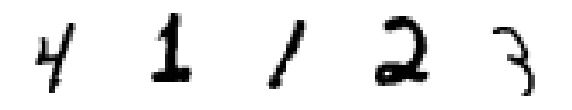

In [60]:
index = 0

plt.figure(figsize=(10,5))
for item in mnist_train.take(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(item[0][0][:,:,0], cmap='binary')

    # item[0] gives the images part of the tuple (images, labels)
    # item[0][0] gives the first batch of the images
    # item[0][0][:,:,0] gives the 28 x 28 matrix ignoring the channel

    plt.grid('off')
    plt.axis('off')
    index += 1
plt.show()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28, 1)),
    keras.layers.Lambda(lambda x: x/255.0),
    keras.layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
lambda (Lambda)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [9]:
model_history = model.fit(mnist_train, epochs=20)

Epoch 1/20
938/938 [==============================] - 8s 7ms/step - loss: 0.4915 - accuracy: 0.8517
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1656 - accuracy: 0.9498
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1204 - accuracy: 0.9633
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0967 - accuracy: 0.9705
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0804 - accuracy: 0.9754
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0682 - accuracy: 0.9788
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0390 - accuracy: 0.9873

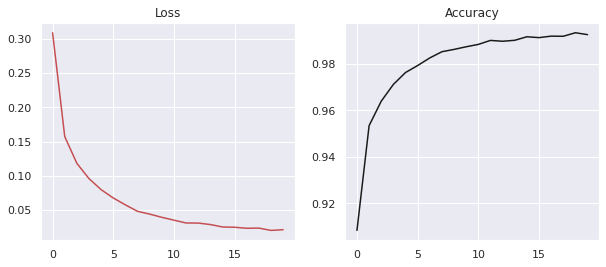

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], color='r')
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], color='k')
plt.title("Accuracy")

plt.show()

In [11]:
model.evaluate(mnist_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.1278 - accuracy: 0.9736


[0.12783950567245483, 0.9735999703407288]

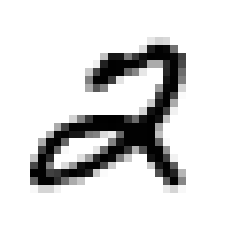

array([[2.8727017e-21, 2.1735828e-11, 1.0000000e+00, 1.0528186e-13,
        2.1659202e-17, 7.4053655e-23, 4.4250570e-20, 2.8885723e-19,
        1.6333209e-16, 1.0128940e-19]], dtype=float32)

In [39]:
for item in mnist_test.take(1):
    arr = item[0][:1]
    plt.imshow(arr[0,:,:,0], cmap='binary')
    plt.axis('off')
    plt.show()

model.predict(arr)

In [19]:
#mount drive first
model.save("/content/drive/MyDrive/Colab Notebooks/models/mnist.h5")

In [91]:
predictions = model.predict(mnist_test)
predictions = np.argmax(predictions, axis=-1)

labels = []
for item in mnist_test:
    for label in item[1]:
        labels.append(label)

confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10, dtype=tf.dtypes.int32
)

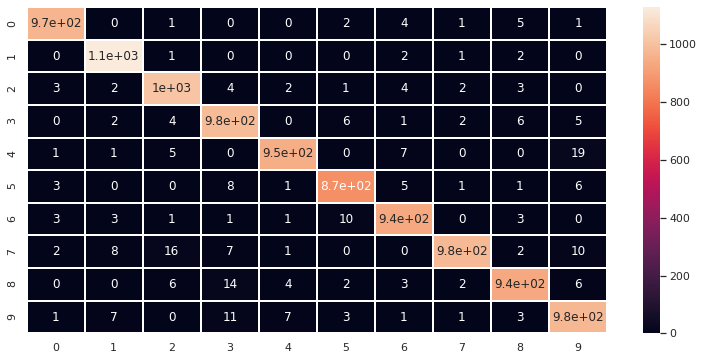

In [89]:
plt.figure(figsize=(13,6))
sns.heatmap(confusion_matrix, annot=True, linewidth=1, linecolor='w')
plt.show()

The heatmaps shows that the classifier is having with the following:

* 2 and 7 (18 wrong)
* 3 and 8 (20 wrong)
* 3 and 9 (16 wrong)
* 4 and 9 (26 wrong)

This is expected as the pairs have similar shaped and even humans get confused among the above mentioned pairs if they are written in a bad hand-writing.